In [1]:
# Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50)

stmath = pd.read_csv('students_math.csv')
stmath.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [2]:
# Columns:
#  1. school     - GP or MS
#  2. sex        - F or M  (don't confuse with gender)
#  3. age        - 15-22
#  4. address    - тип адреса ученика ('U' - городской, 'R' - за городом)
#  5. famsize    - размер семьи('LE3' <= 3, 'GT3' >3)
#  6. Pstatus    - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#  7. Medu       - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#  8. Fedu       - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) !!!! issue
#  9. Mjob       - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# 10. Fjob       - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# 11. reason     - причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# 12. guardian   - опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# 13. traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 14. studytime  - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# 15. failures   - количество внеучебных неудач (n, если 1<=n<3, иначе 0)
# 16. schoolsup  - дополнительная образовательная поддержка (yes или no)
# 17. famsup     - семейная образовательная поддержка (yes или no)
# 18. paid       - дополнительные платные занятия по математике (yes или no)
# 19. activities - дополнительные внеучебные занятия (yes или no)
# 20. nursery    - посещал детский сад (yes или no)
# 21. higher     - хочет получить высшее образование (yes или no)
# 22. internet   - наличие интернета дома (yes или no)
# 23. romantic   - в романтических отношениях (yes или no)
# 24. famrel     - семейные отношения (от 1 - очень плохо до 5 - очень хорошо) !!!!issue
# 25. freetime   - свободное время после школы (от 1 - очень мало до 5 - очень мого)
# 26. goout      - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# 27. health     - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# 28. absences   - количество пропущенных занятий
# 29. score      - баллы по госэкзамену по математике

In [3]:
stmath.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [4]:
# 1. Pep8

#  7. Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#  8. Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) !!!! issue
def fix0to4(x):
    if x < 0.0:
        return 0.0
    elif x > 4.0:
        return 4.0
    else:
        return x
    
# 13. traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 14. studytime  - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
def fix1to4(x):
    if x < 1.0:
        return 1.0
    elif x > 4.0:
        return 4.0
    else:
        return x
    
# 15. failures - количество внеучебных неудач (n, если 1<=n<3, иначе 0)
def fix0to3(x):
    if x < 0.0:
        return 0.0
    elif x > 3.0:
        return 3.0
    else:
        return x

# 24. famrel     - family relationship (where 1 is bad and 5 is great) 
# 25. freetime   - free time after school (where 1 is low and 5 is a lot)
# 26. goout      - partying with friends (where 1 is low and 5 is a lot)
# 27. health     - health is health (where 1 is bad and 5 is great)
def fix1to5(x):
    if x < 1.0:
        return 1.0
    elif x > 5.0:
        return 5.0
    else:
        return x

In [5]:
stmath.Medu = stmath.Medu.apply(fix0to4).sort_values()
stmath.Fedu = stmath.Fedu.apply(fix0to4).sort_values()

In [6]:
stmath.traveltime = stmath.traveltime.apply(fix1to4).sort_values()
stmath.studytime = stmath.studytime.apply(fix1to4).sort_values()

In [7]:
stmath.famrel = stmath.famrel.apply(fix1to5).sort_values()
stmath.freetime = stmath.freetime.apply(fix1to5).sort_values()
stmath.goout = stmath.goout.apply(fix1to5).sort_values()
stmath.health = stmath.health.apply(fix1to5).sort_values()

Column Name : 'school' has empty rows : 0
Column Name : 'sex' has empty rows : 0
Column Name : 'age' has empty rows : 0
Column Name : 'address' has empty rows : 17
Column Name : 'famsize' has empty rows : 27
Column Name : 'Pstatus' has empty rows : 45
Column Name : 'Medu' has empty rows : 3
Column Name : 'Fedu' has empty rows : 24
Column Name : 'Mjob' has empty rows : 19
Column Name : 'Fjob' has empty rows : 36
Column Name : 'reason' has empty rows : 17
Column Name : 'guardian' has empty rows : 31
Column Name : 'traveltime' has empty rows : 28
Column Name : 'studytime' has empty rows : 7
Column Name : 'failures' has empty rows : 22
Column Name : 'schoolsup' has empty rows : 9
Column Name : 'famsup' has empty rows : 39
Column Name : 'paid' has empty rows : 40
Column Name : 'activities' has empty rows : 14
Column Name : 'nursery' has empty rows : 16
Column Name : 'studytime, granular' has empty rows : 7
Column Name : 'higher' has empty rows : 20
Column Name : 'internet' has empty rows : 

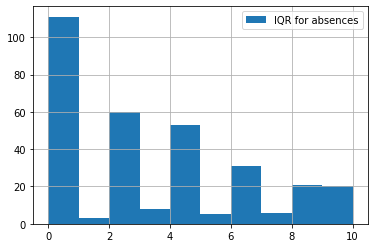

In [8]:
# 2. Для каждого столбца 
    # 2.1) найдено количество пустых строк; 
    # 2.2) найдены и убраны выбросы. 
for column in stmath:
    # 2.1
    print("Column Name : '{N}' has empty rows : {E}".format(N = column, E = stmath[column].isna().sum()))
    # 2.2
    if stmath[column].dtypes == float or stmath[column].dtypes == int:
        # the only numerical column without limits (score has limits from 0 to 100)
        if column == 'absences': 
            median = stmath[column].median()
            perc25 = stmath[column].quantile(0.25)
            perc75 = stmath[column].quantile(0.75)
            IQR = perc75 - perc25
            lower_border = perc25 - 1.5*IQR
            upper_border = perc75 + 1.5*IQR

            print('\t25%: {},'.format(perc25), 
                  '\n\t75%: {},'.format(perc75), 
                  "\n\tIQR: {}, ".format(IQR),
                  "\n\tBorders: [{f}, {l}].".format(f=lower_border, l=upper_border))
            stmath[column].loc[stmath[column].between(lower_border, upper_border)].hist(bins = 10, range = (0, 10), label = 'IQR for ' + column)
            plt.legend();
            # remove outliers
            stmath = stmath.loc[stmath[column].between(lower_border, upper_border)]

In [9]:
# 3 Make histograms for 
# Medu, Fedu, Mjob, Fjob, reason, guardian, 
# traveltime, studytime, failures, famrel, freetime, goout, health.

# We should skip 
# sex, address, famsize, Pstatus, schoolsup, famsup, paid, 
# activities, nursery, higher, internet, romantic

count    363.000000
mean       2.738292
std        1.105158
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

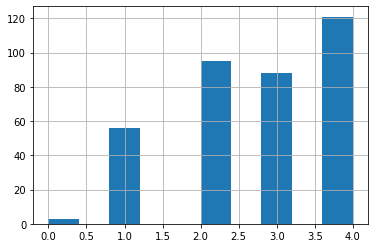

In [10]:
#  7. Medu - mother's education (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
stmath.Medu.hist()
stmath.Medu.describe()

count    343.000000
mean       2.483965
std        1.094459
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

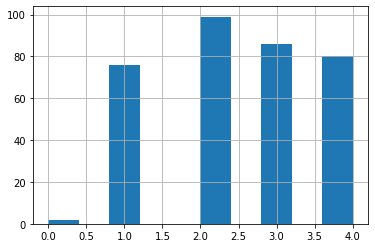

In [11]:
#  8. Fedu - father's education (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) !!!! issue
stmath.Fedu.hist()
stmath.Fedu.describe()

count       350
unique        5
top       other
freq        123
Name: Mjob, dtype: object

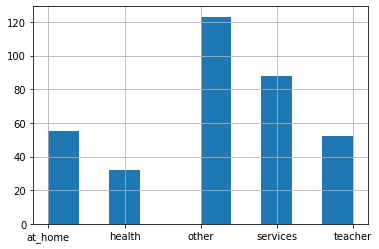

In [12]:
stmath.Mjob.hist()
stmath.Mjob.describe()

count       332
unique        5
top       other
freq        185
Name: Fjob, dtype: object

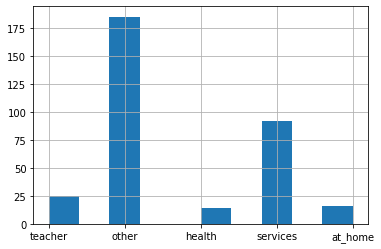

In [13]:
stmath.Fjob.hist()
stmath.Fjob.describe()

count        349
unique         4
top       course
freq         129
Name: reason, dtype: object

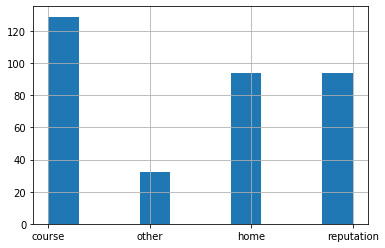

In [14]:
stmath.reason.hist()
stmath.reason.describe()

count        336
unique         3
top       mother
freq         229
Name: guardian, dtype: object

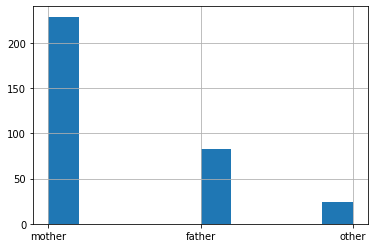

In [15]:
stmath.guardian.hist()
stmath.guardian.describe()

count    338.000000
mean       1.446746
std        0.709289
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

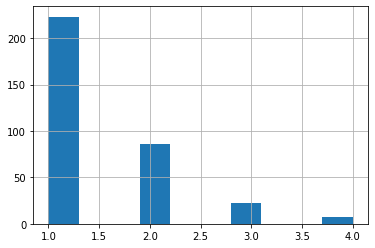

In [16]:
# 13. traveltime - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
stmath.traveltime.hist()
stmath.traveltime.describe()

count    361.000000
mean       2.049861
std        0.854892
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

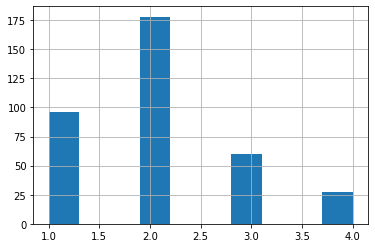

In [17]:
# 14. studytime - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
stmath.studytime.hist()
stmath.studytime.describe()

count    347.000000
mean       0.319885
std        0.732193
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

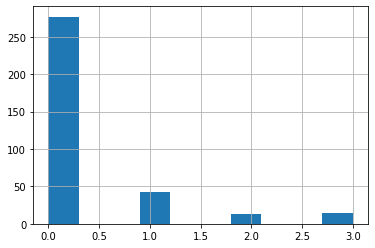

In [18]:
# 15. failures - количество внеучебных неудач (n, если 1<=n<3, иначе 0)
stmath.failures.hist()
stmath.failures.describe()

count    340.000000
mean       3.955882
std        0.912610
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

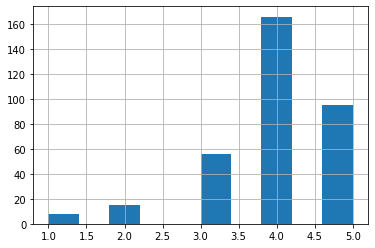

In [19]:
# 24. famrel - family relationship (where 1 is bad and 5 is great) 
stmath.famrel.hist()
stmath.famrel.describe()

count    357.000000
mean       3.254902
std        0.982721
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

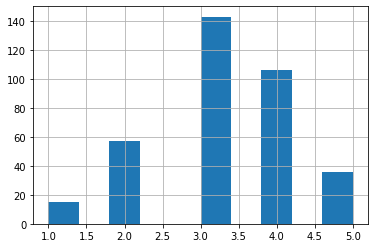

In [20]:
# 25. freetime - free time after school (where 1 is low and 5 is a lot)
stmath.freetime.hist()
stmath.freetime.describe()

count    358.000000
mean       3.089385
std        1.106563
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

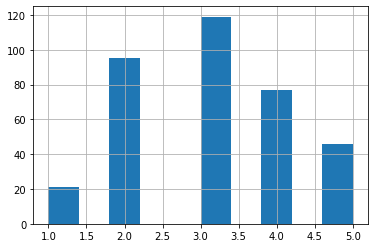

In [21]:
# 26. goout      - partying with friends (where 1 is low and 5 is a lot)
stmath.goout.hist()
stmath.goout.describe()

count    351.000000
mean       3.552707
std        1.384377
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

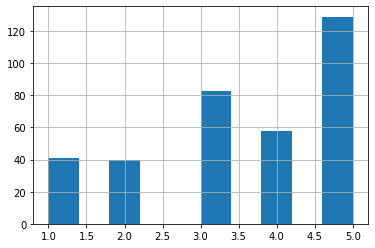

In [22]:
# 27. health     - health is health (where 1 is bad and 5 is great)
stmath.health.hist()
stmath.health.describe()

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

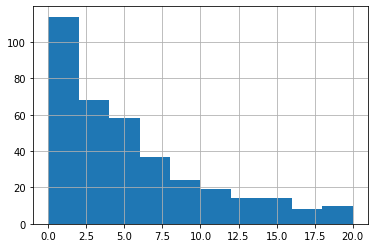

In [23]:
# 28. absences - the amount of missed lessons
stmath.absences.hist()
stmath.absences.describe()

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

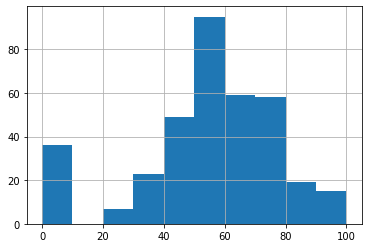

In [24]:
# 29. score - math score
stmath.score.hist()
stmath.score.describe()

/Users/inikki/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/inikki/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


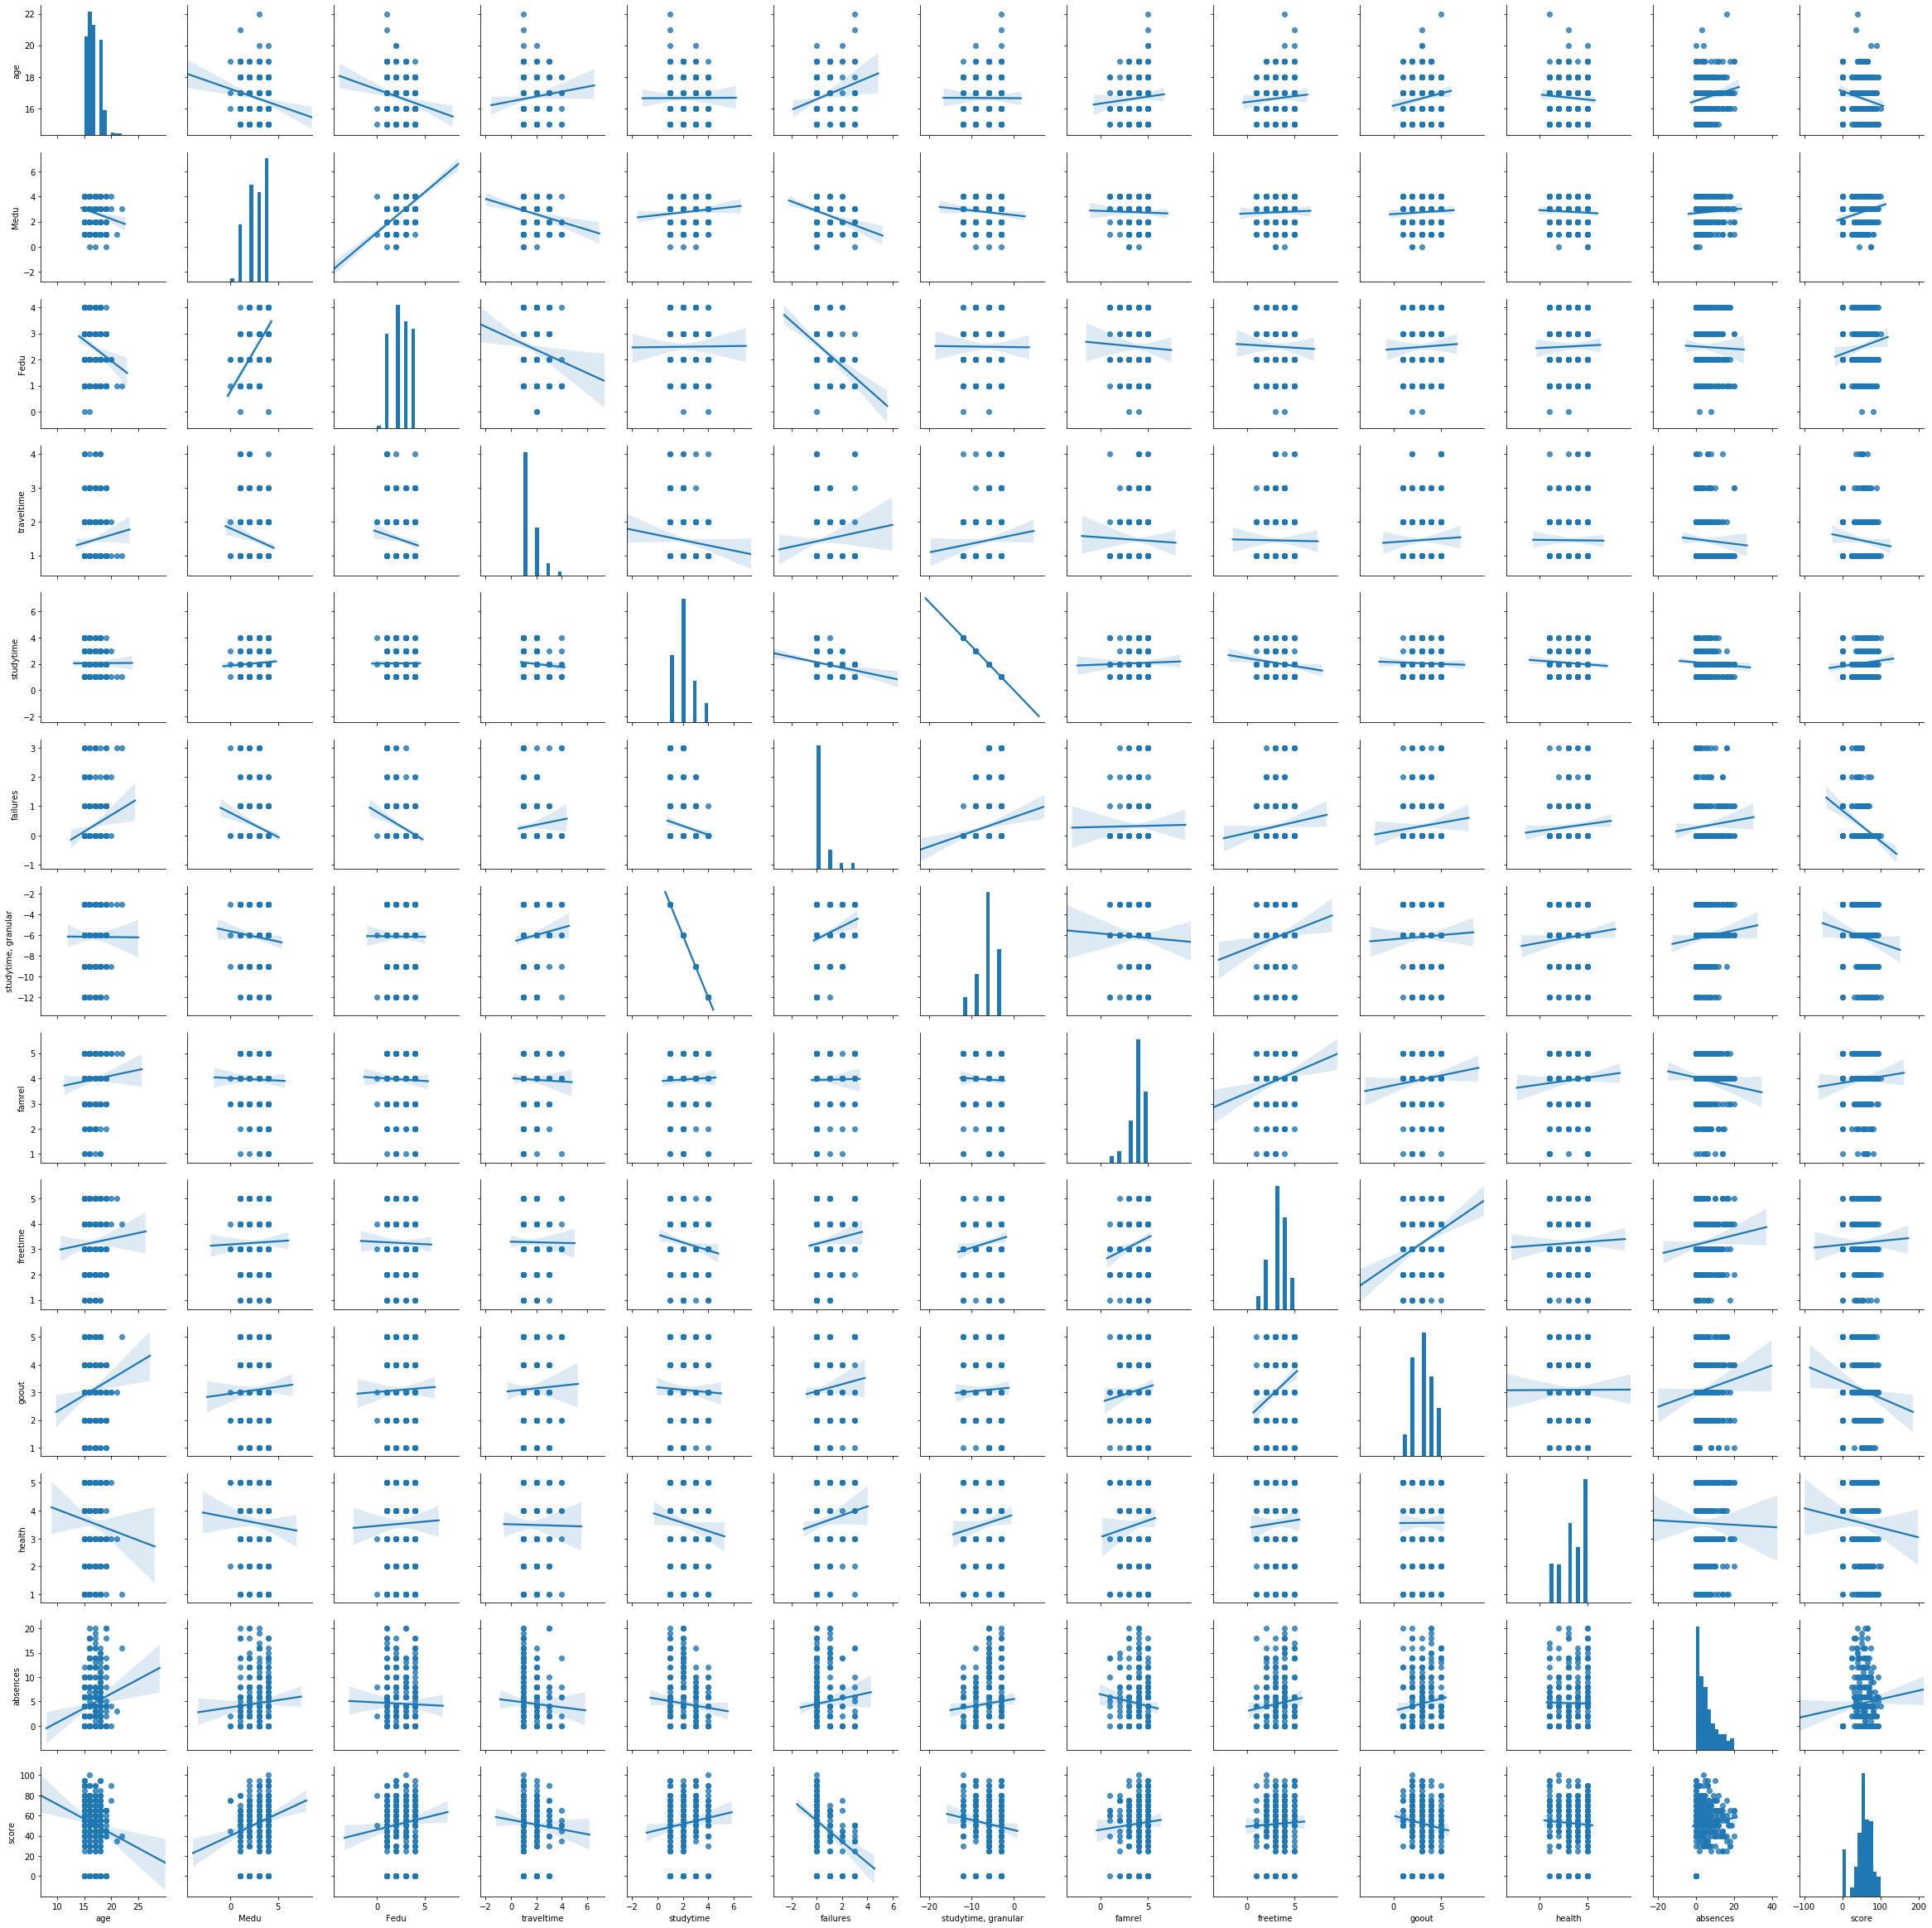

In [25]:
# 4.
sns.pairplot(stmath, kind = 'reg')

In [26]:
stmath.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.185368,0.085659,0.003035,0.195400,-0.003035,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.629212,-0.197009,0.085532,-0.249754,-0.085532,-0.023323,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.185368,0.629212,1.000000,-0.145846,0.005116,-0.289421,-0.005116,-0.029874,-0.021205,0.029427,0.023932,-0.021811,0.113379
traveltime,0.085659,-0.197009,-0.145846,1.000000,-0.093825,0.085026,0.093825,-0.025343,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.005116,-0.093825,1.000000,-0.174802,-1.000000,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.289421,0.085026,-0.174802,1.000000,0.174802,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542
"studytime, granular",-0.003035,-0.085532,-0.005116,0.093825,-1.000000,0.174802,1.000000,-0.029926,0.136510,0.034197,0.090552,0.078099,-0.113113
famrel,0.063204,-0.023323,-0.029874,-0.025343,0.029926,0.009730,-0.029926,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516
freetime,0.058193,0.027861,-0.021205,-0.008602,-0.136510,0.098642,0.136510,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.029427,0.031481,-0.034197,0.085448,0.034197,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246


In [27]:
# This correction shows that the highest parameters which affect score is 
# 1) failures (32%)
# 2) Medu (21%)
# 3) Age (15,9%)
# 4) goout (12%)
# 5) Fedu (11,3%)
# 6) studytime (11,3%)
# Other parameters are less than 10%


In [28]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stmath.loc[stmath.loc[:, column].isin(stmath.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [29]:
def get_stat_dif(column):
    cols = stmath.loc[:, column].value_counts().index[:2]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stmath.loc[stmath.loc[:, column] == comb[0], 'score'], 
                        stmath.loc[stmath.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

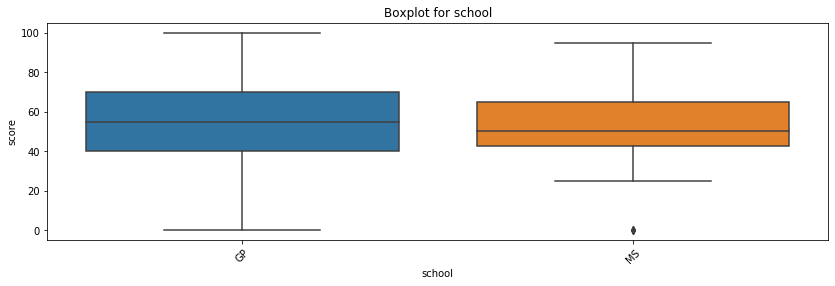

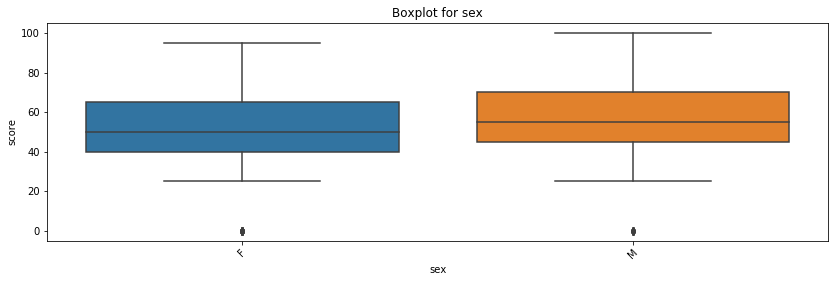

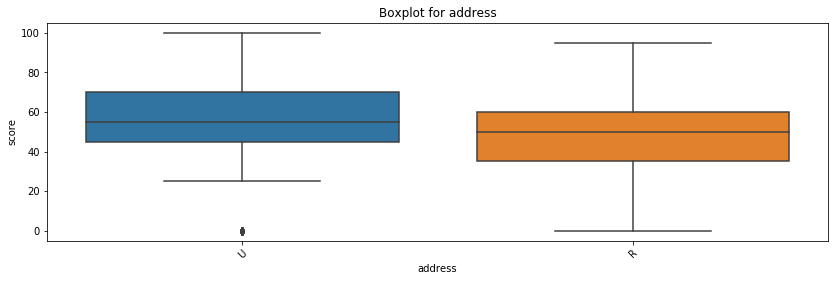

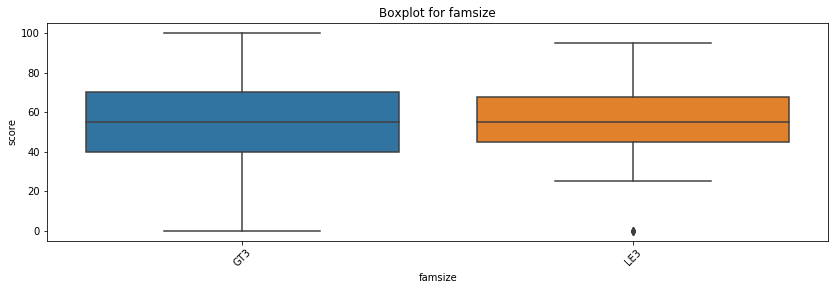

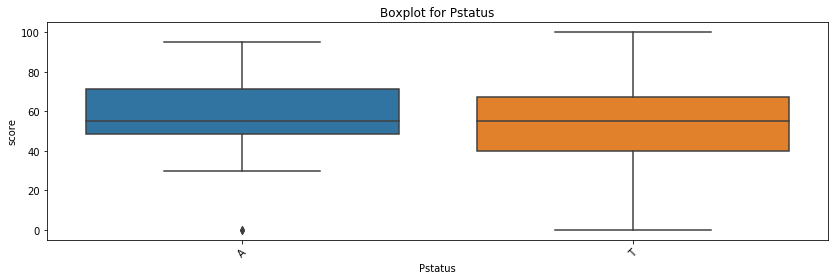

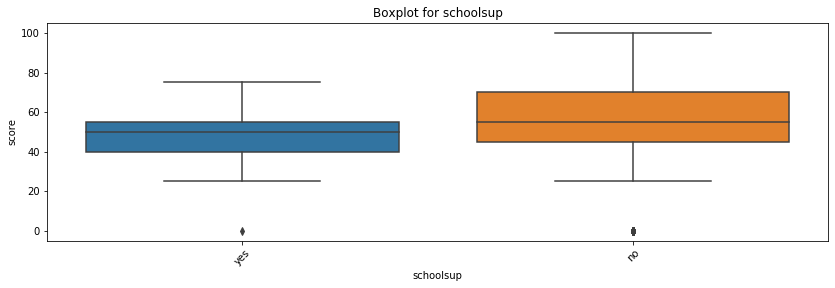

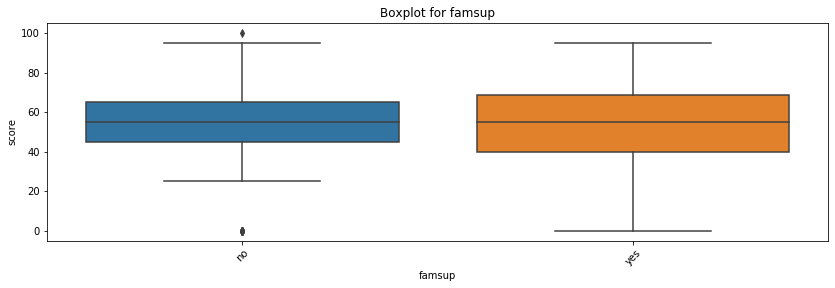

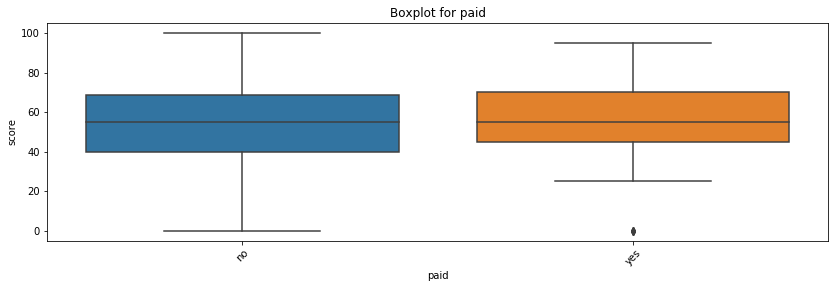

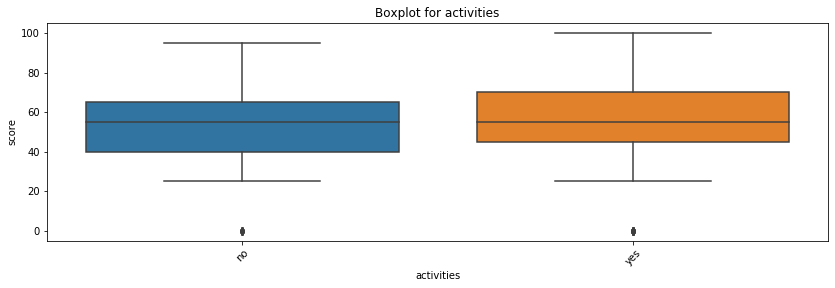

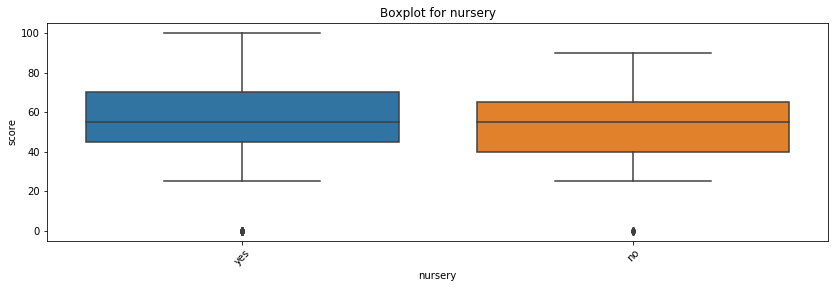

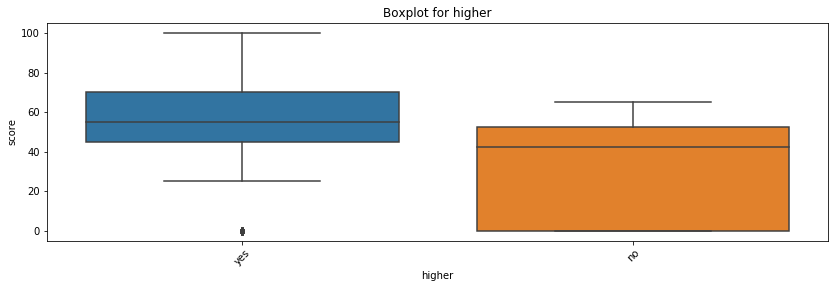

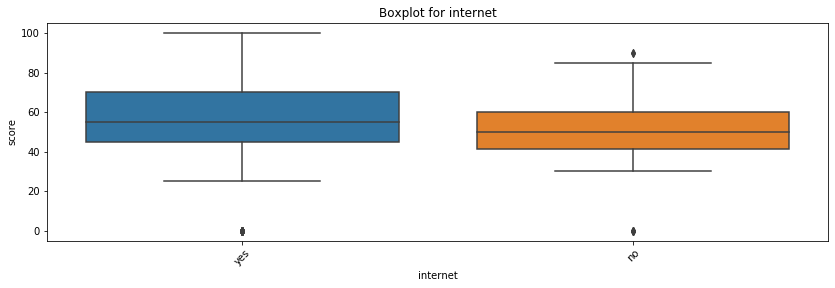

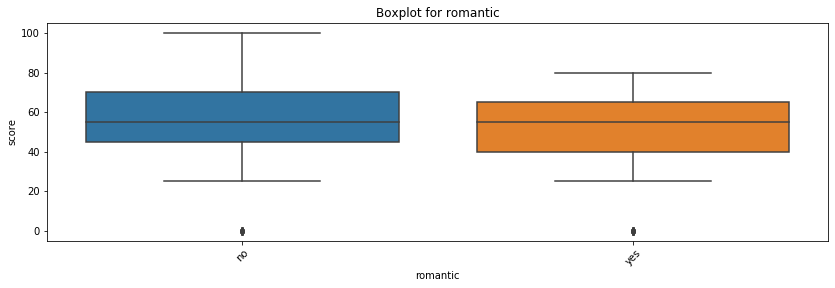

In [30]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [31]:
# nominative variables
# 1) higher
# 2) internet
# 3) romantic
# 4) nursery
# 5) schoolsup

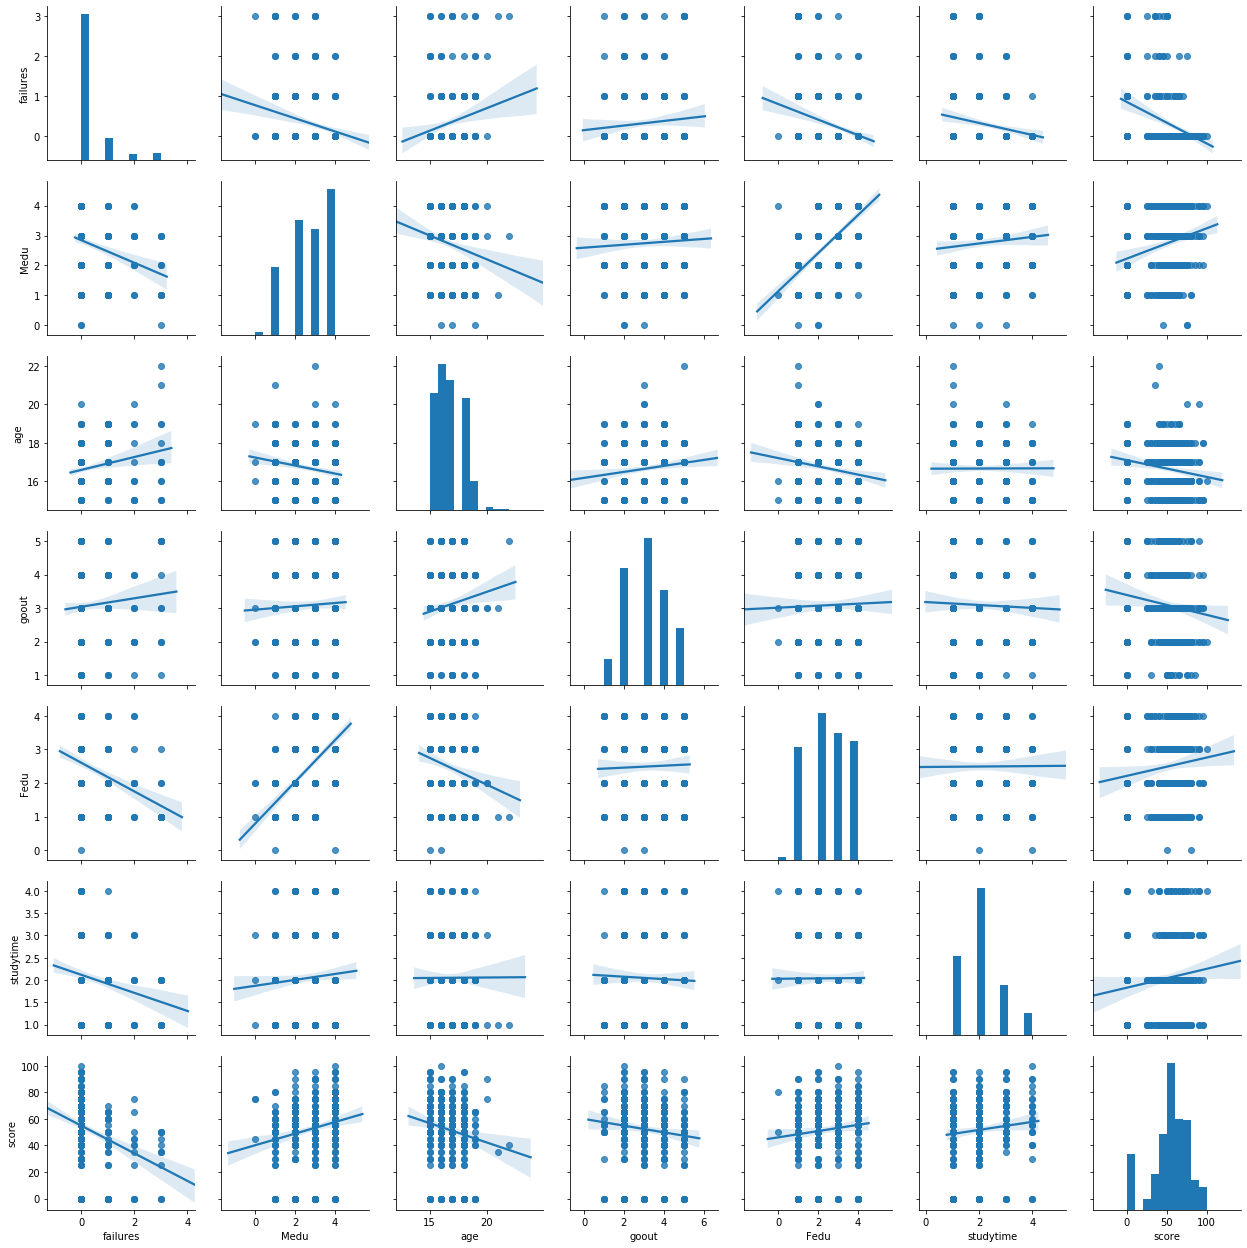

In [41]:
# 5

# This correction shows that the highest parameters which affect score is 
# 1) failures (32%)
# 2) Medu (21%)
# 3) Age (15,9%)
# 4) goout (12%)
# 5) Fedu (11,3%)
# 6) studytime (11,3%)
# Other parameters are less than 10%
type(stmath)
stmath_corr = stmath[['failures', 'Medu', 'age', 'higher', 'goout', 'Fedu', 'studytime', 'score']]
sns.pairplot(stmath_corr, kind = 'reg')

In [ ]:
# Results

# This graph shows that student's scores depends (in the most cases) on student's failures. 
# That's not a surprise, but now we have a numerical data to prove it. 
# It's also the most important parameter in the numerical data.

# Columns 'Medu', 'age', 'goout', 'Fedu', 'studytime' also influence the score. Although not much.

# Fun fact: We found that usually parents have the correlation in their education. 
# It means that a father usually has the same level of education as a mother.

# Nominative variables shows us that the most important variable there is 'higher' column.
# That's explainable, as students that are not going to be in UNI usually have not desire to study.